# Project - EDA with Pandas Using the Boston Housing Data

## Introduction

In this section you've learned a lot about importing, cleaning up, analysing (using descriptive statistics) and visualizing data. In this more free form project you'll get a chance to practice all of these skills with the Boston Housing data set, which contains housing values in suburbs of Boston. The Boston Housing Data is commonly used by aspiring data scientists.

## Objectives

You will be able to:

* Load csv files using Pandas
* Find variables with high correlation
* Create box plots

# Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At minimum, this should include:

* Loading the data (which is stored in the file train.csv)
* Use built-in python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations using `.loc`, `.iloc` or related operations. Explain why you used the chosen subsets and do this for 3 possible 2-way splits. State how you think the 2 measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:
    - Create a 2 new dataframes based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't.
    - Create 2 new datagrames based on a certain split for crime rate.
* Next, use histograms and scatterplots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

Text(0.5,1,'Crime Rate vs. Pupil/teacher Ratio (High Crime Rate Towns)')

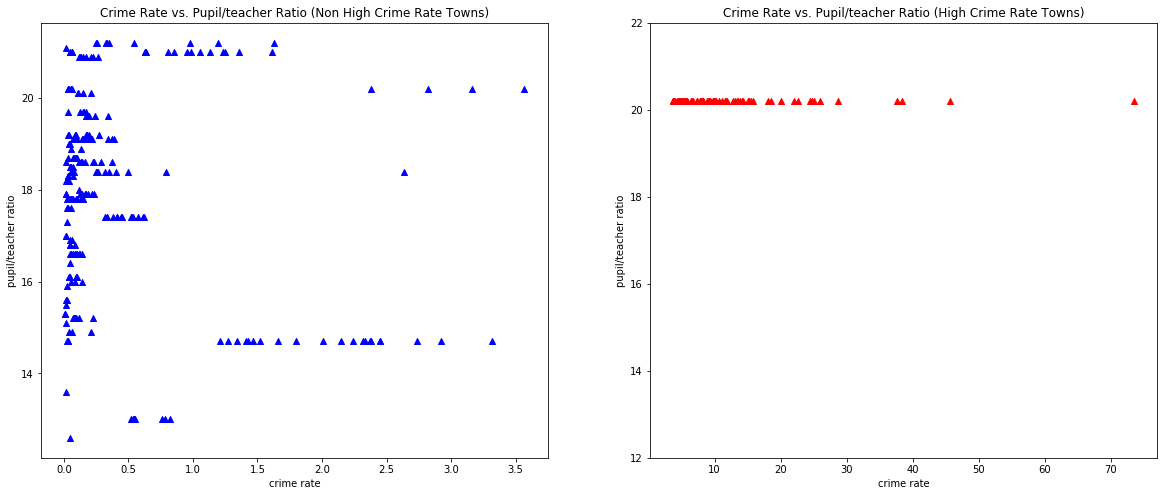

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#---LOADING THE DATA---
df = pd.read_csv('train.csv')

#---CENTRALITY AND DISPERSION---
median_crime_rate = df['crim'].median()
stddev_pupil_teacher_ratio = df['ptratio'].std()
median_nox = df['nox'].median()

#---SUBSETS---
#Top 25% in crime rate
crime_rate_75th_quantile = df['crim'].quantile(.75)
crime_rate_75th_quantile

high_crime = df.loc[(df['crim'] >= crime_rate_75th_quantile)]
non_high_crime = df.loc[(df['crim'] < crime_rate_75th_quantile)]

#Towns above average vs. below average in nox
avg_nox_rate = df['nox'].mean()
above_average_pollution = df.loc[(df['nox'] >= avg_nox_rate)]
below_average_pollution = df.loc[(df['nox'] < avg_nox_rate)]

#Top 25% oldest towns
age_10th_quantile = df['age'].quantile(.1)
top10percent_oldest_towns = df.loc[(df['age'] <= age_10th_quantile)]
bottom90percent_oldest_towns = df.loc[(df['age'] > age_10th_quantile)]

#---OBSERVED DIFFERENCES---
#How does crime rate correlate to pupil-teacher ratio in high crime-rate cities vs. the rest of the data set?
high_crime_x = df.loc[(df['crim'] >= crime_rate_75th_quantile),'crim']
high_crime_x = list(high_crime_x)
high_crime_x
high_crime_y = df.loc[(df['crim'] >= crime_rate_75th_quantile),'ptratio']
high_crime_y = list(high_crime_y)
high_crime_y #High Crime

non_high_crime_x = df.loc[(df['crim'] < crime_rate_75th_quantile), 'crim']
non_high_crime_y = df.loc[(df['crim'] < crime_rate_75th_quantile), 'ptratio']

fig = plt.figure(figsize=(20,8))

fig_ax1 = fig.add_subplot(121)
fig_ax2 = fig.add_subplot(122)

fig_ax2.scatter(high_crime_x, high_crime_y, color='red', marker='^')
fig_ax1.scatter(non_high_crime_x, non_high_crime_y, color='blue', marker='^')

fig_ax1.set_xlabel('crime rate')
fig_ax1.set_ylabel('pupil/teacher ratio')
fig_ax1.set_title('Crime Rate vs. Pupil/teacher Ratio (Non High Crime Rate Towns)')
fig_ax2.set_ylim(12,22)
fig_ax2.set_xlabel('crime rate')
fig_ax2.set_ylabel('pupil/teacher ratio')
fig_ax2.set_title('Crime Rate vs. Pupil/teacher Ratio (High Crime Rate Towns)')


In [73]:
#How does the distribution of nox rate compare in towns that are above average vs. below?
above_average_pollution_nox = df.loc[(df['nox'] >= avg_nox_rate), 'nox']
above_average_pollution_nox = list(above_average_pollution_nox)

below_average_pollution_nox = df.loc[(df['nox'] < avg_nox_rate), 'nox']
below_average_pollution_nox = list(below_average_pollution_nox)


data = pd.DataFrame({'above average': above_average_pollution_nox,
                    'below average': below_average_pollution_nox},
                     index = range(0, len(above_average_pollution_nox)))

data.plot.hist(alpha = 0.7) 

AttributeError: 'list' object has no attribute 'plot'

# Variable Descriptions

This data frame contains the following columns:

#### crim  
per capita crime rate by town.

#### zn  
proportion of residential land zoned for lots over 25,000 sq.ft.

#### indus  
proportion of non-retail business acres per town.

#### chas  
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

#### nox  
nitrogen oxides concentration (parts per 10 million).

#### rm  
average number of rooms per dwelling.

#### age  
proportion of owner-occupied units built prior to 1940.

#### dis  
weighted mean of distances to five Boston employment centres.

#### rad  
index of accessibility to radial highways.

#### tax  
full-value property-tax rate per $10,000.

#### ptratio  
pupil-teacher ratio by town.

#### black  
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

#### lstat  
lower status of the population (percent).

#### medv  
median value of owner-occupied homes in $10000s.
  
  
  
Source
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

## Summary

Congratulations, you've completed your first "freeform" exploratory data analysis of a popular data set!